<a href="https://colab.research.google.com/github/BEKKAMSHIVA/OCR_TEXT_EXTRACTION/blob/main/OCR_Adharra_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Setup

In [ ]:
 #These libraries are used to set up the environment for extracting text from images using OCR.
!pip install pytesseract opencv-python
!sudo apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


#Upload and Validate .jpg Files

In [ ]:
#Importing Required Libraries
import cv2
import pytesseract
from google.colab import files

In [ ]:
# only jpg format files need to uploaded here
from google.colab import files
uploaded = files.upload()
if len(uploaded) == 0:
    print("No addhar card is not uploaded and Skipping this process.")
else:
    file_name = next(iter(uploaded))
    if not file_name.lower().endswith('.jpg'):
        print("Error: Please upload the addhar card in the jpg format only.")
    else:
        print(f"File '{file_name}' addhar card uploaded successfully.")



#upload the jpg file from your system directly(choose files).

Saving aahar new_page-0001.jpg to aahar new_page-0001 (1).jpg
File 'aahar new_page-0001 (1).jpg' addhar card uploaded successfully.


# Displaying  the Uploaded Image for Cross-Checking

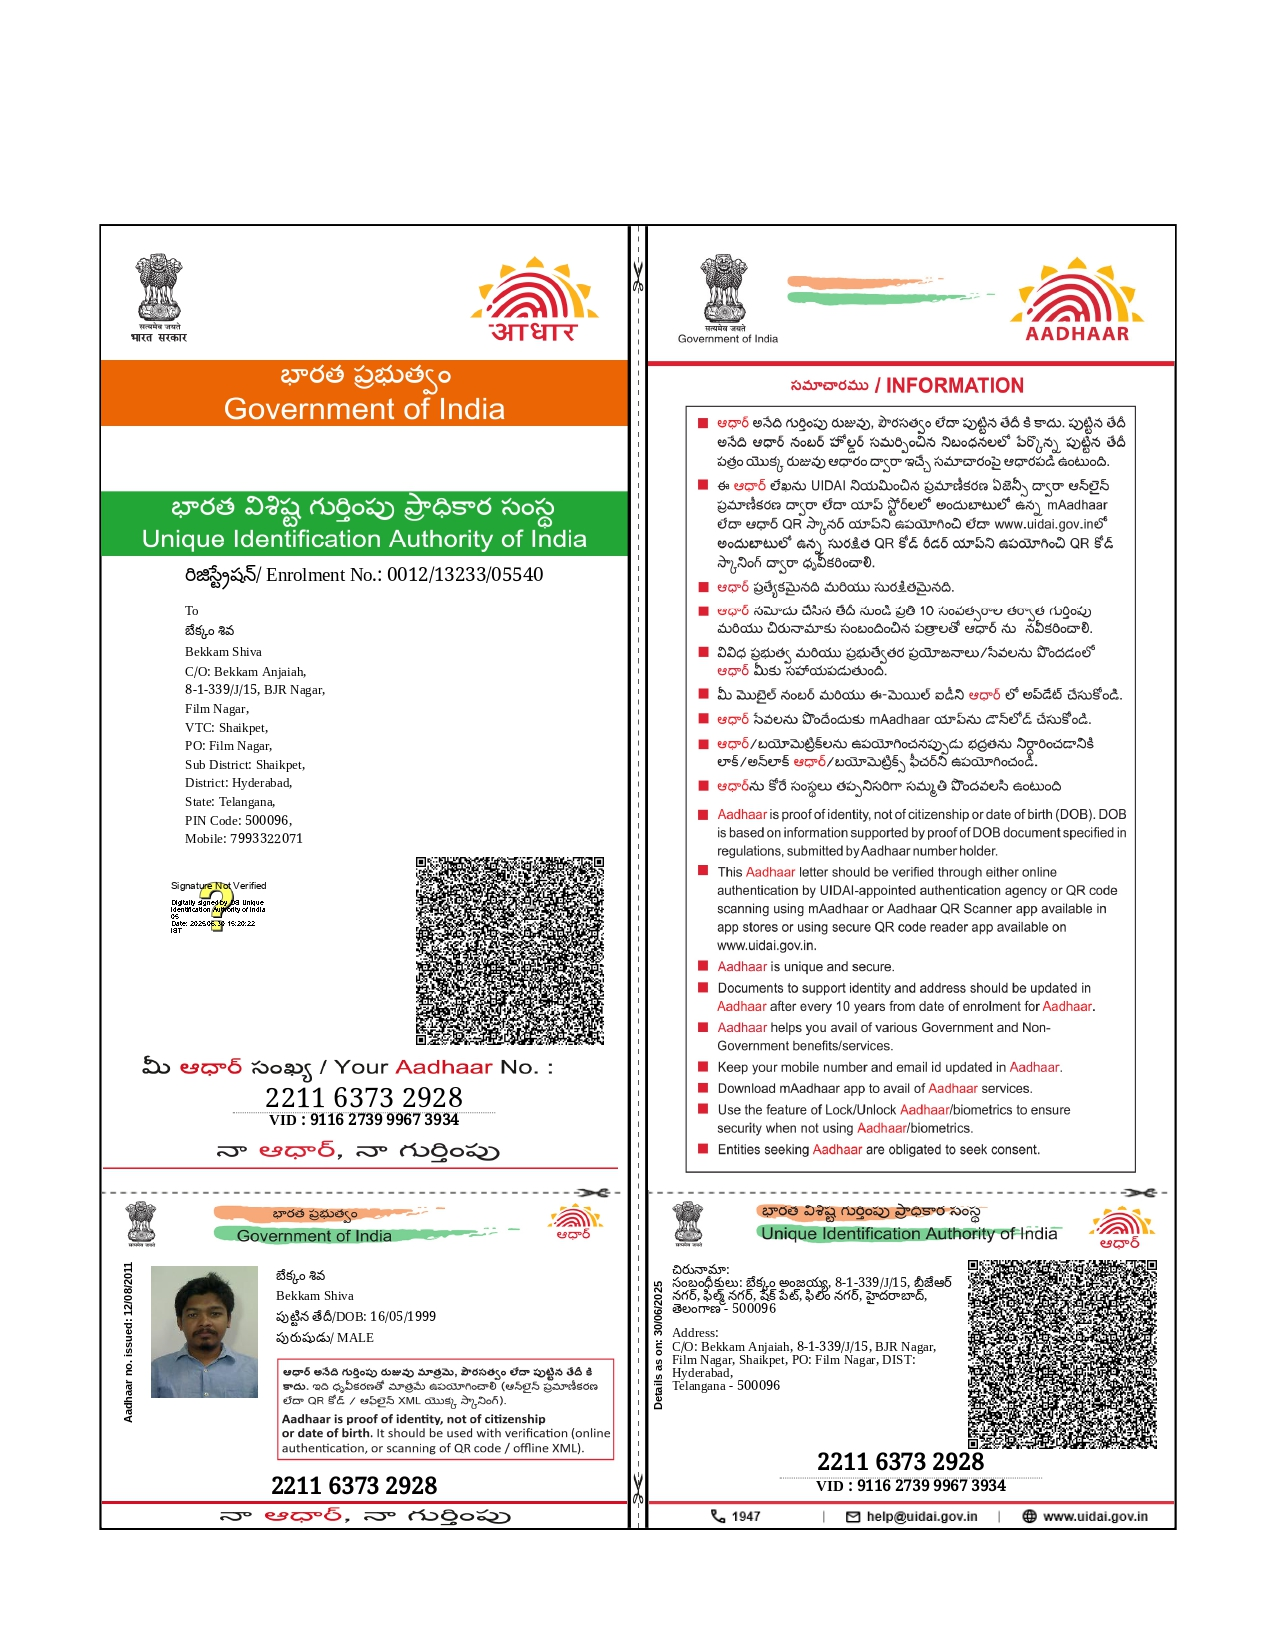

In [ ]:
#Cross checking whether we have uploaded correct jpg file or not.
from IPython.display import Image, display
display(Image(file_name, width=200))

# Image Reading and  Grayscale convetion Preprocess.

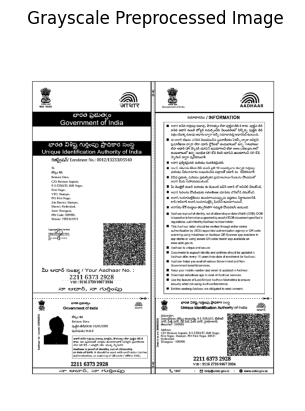

In [ ]:
#Converting in to Grayscale and Thresholding to Enhance Image Clarity for Better Text Detection.
image = cv2.imread(file_name)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)                                         # Coverting in to grayscale
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]             # Applying Thresholding its  optional but improves accuracy



import matplotlib.pyplot as plt       #Display the Grayscale Image
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title(' Grayscale Preprocessed Image')
plt.show()


#Text Extraction using OCR

In [ ]:
# Moving the downloaded Telugu language file to the tessdata folder
# Without this step, Tesseract will not detect Telugu text.
!mv /content/tel.traineddata /usr/share/tesseract-ocr/4.00/tessdata/


mv: cannot stat '/content/tel.traineddata': No such file or directory


In [ ]:
# Listing all the languages currently available in Tesseract OCR.
# If 'tel' appears in the list, Telugu text extraction can proceed.
!tesseract --list-langs

List of available languages (3):
eng
osd
tel


In [ ]:
# Extract English and Telugu Text using OCR    #by using the oem 3 --psm 6 we can imporve the  accuracy and efficiency of text extraction.
extracted_text = pytesseract.image_to_string(gray, lang='eng+tel', config='--oem 3 --psm 6')

#Drawing the bounding boxes around the extracted text.

In [ ]:
#Drawing the bounded box around what text we extracted form the given jpg file
details = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT, lang='eng+tel', config='--oem 3 --psm 6')
n_boxes = len(details['level'])                                                                          # Draw bounding boxes
for i in range(n_boxes):
    (x, y, w, h) = (details['left'][i], details['top'][i], details['width'][i], details['height'][i])
    if int(details['conf'][i]) > 30:                                                                     # Confidence threshold
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

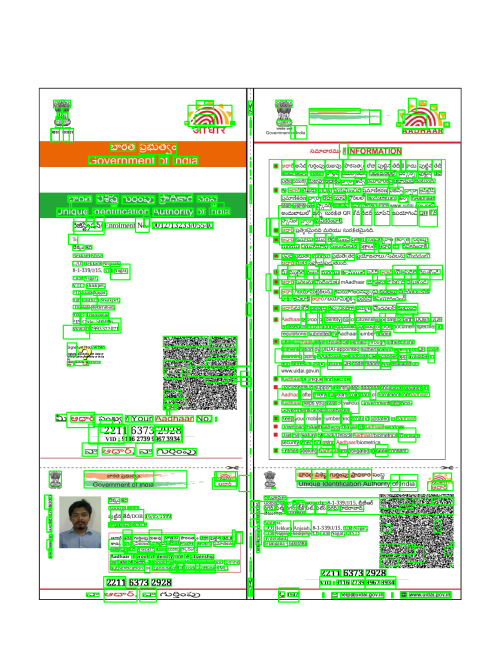

In [ ]:
# Resized  the image to 500 pixels width before displaying
target_width = 500
height, width = image.shape[:2]
aspect_ratio = target_width / width
new_dimensions = (target_width, int(height * aspect_ratio))
resized_image = cv2.resize(image, new_dimensions, interpolation=cv2.INTER_AREA)

# Displaying  the resized image with bounding boxes.
from google.colab.patches import cv2_imshow
cv2_imshow(resized_image)


#Display Output

In [ ]:
#Display Extracted Text
print("Extracted Text from the Uploaded Image:")
print(extracted_text)

Extracted Text from the Uploaded Image:
Eee (|
a, GZ yy న
Cp TEN | ళా
ser wea 3౪౯ | covinrent st na AADHAAR
ప్ర '
భారత ప్రభుత్వం | dared | INFORMATION
eT Ce ౬1౬౬) ' జై అధారి అనేది గుర్తింపు రుజువు, పౌరసత్వం లేదా పుట్టిన తేదీ క కాదు. పుట్టిన తేదీ
' అనేది ఆధార్‌ నంబర్‌ హోల్డర్‌ సమర్పించిన నిబంధనలలో పీర్కొన్న పుట్టిన తేదీ
క పత్రం యొక్క రుజువు ఆధారం ద్వారా ఇద్చే సమాచారంపై ఆధారపడీ ఉంటుంది.
| జ ఈ ఆదార్‌ లేఖను ౮104! నియమించిన ప్రమాణికరణ ఏజెన్సీ ద్వారా ఆన్‌లైన్‌
కనే ere) I ప్రమాణికరణ ద్వారా లేదా యాప్‌ స్టోర్‌లో అందుబాటులో జిన్న 1426128
క ట్ట = ~~ an 1 లేదా ఆధార్‌ ౦గ స్కానర్‌ యాప్‌ని ఉపయోగించి లేదా ౪౪౪. ౮|1౩1.601.1౧లో
Unique Identification Authority of India ! అందుబాటులో 3) mile (౧ కోడ్‌ రీడర్‌ యాప్‌ని ఉపయోగించి QR EE
నా కై ' స్కానింగ్‌ ద్వారా ధృవీకరించాలి.
రిజిస్ట్రేషన్‌/ [౯౦1౧౧౭౧ [10.: 0012/13233/05540 | జ అధర ప్రత్యేకమైనది సురకితమైనది.
To ' జై ఆదార్‌ మోయు చేసిన తేదీ సుండి ప్రతి 10 సంవత్సలాల తల్ఫాత గుర్తింపు
జేక్కం శివ 1 మరియు చిరునామాకు సంబంధించిన పత్రాలతో ఆధార్‌ ను నీవీకరిందాలి.
Bekkam Shiv

#Saving the extracted text

In [ ]:
# saving the extracted text from the jpg image
file_name = "Extracted_Text_Addhar_Eng_Tel.txt"
with open(file_name, "w") as file:
   file.write(extracted_text)

print(f" Text successfully saved to '{file_name}'")

 Text successfully saved to 'Extracted_Text_Addhar_Eng_Tel.txt'


#Create a download link for the file

In [ ]:
#Create a download link for the extracted text for our access and further analysis in to our system
from google.colab import files
files.download(file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>